# This notebook is used to perform bioLUCID on human PBMC data

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import biolucid

/scratch/silas.sun/anaconda3/envs/py_scrna_seq/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/scratch/silas.sun/anaconda3/envs/py_scrna_seq/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/scratch/silas.sun/anaconda3/envs/py_scrna_seq/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/scratch/silas.sun/anaconda3/envs/py_scrna_seq/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/scratch/silas.sun/anaconda3/envs/py_scrna_seq/lib/python3

# Load data

In [2]:
adata = sc.read_h5ad('/scratch/silas.sun/Project/Batch_effect_benchmarking/batch_effect_QC/S05_bioLUCID_repo_preparation/tests/data/human_PBMC_data.h5ad')

In [3]:
print(f"Number of cells: {adata.n_obs}")
print(f"Number of genes: {adata.n_vars}")
print("Unique batches:")
print(adata.obs['seq'].unique())
print("\nUnique cell types:")
print(adata.obs['celltype'].unique())

Number of cells: 9089
Number of genes: 22036
Unique batches:
['10x-Chromium-v2-A', '10x-Chromium-v2-B', '10x-Chromium-v3']
Categories (3, object): ['10x-Chromium-v2-A', '10x-Chromium-v2-B', '10x-Chromium-v3']

Unique cell types:
['Mono', 'pDCs', 'B Cell', 'T Cell', 'DC Cell', 'MGK']
Categories (6, object): ['B Cell', 'DC Cell', 'MGK', 'Mono', 'T Cell', 'pDCs']


In [4]:
print("Batch-celltype distribution:")
print(pd.crosstab(adata.obs['seq'], adata.obs['celltype']))

Batch-celltype distribution:
celltype           B Cell  DC Cell  MGK  Mono  T Cell  pDCs
seq                                                        
10x-Chromium-v2-A     438      166   41   986    3104    33
10x-Chromium-v2-B     371       34   43   393    2152     0
10x-Chromium-v3       101       29   23   161    1014     0


# Run bioLUCID

In [5]:
analyzer = biolucid.core.BatchEffectAnalyzer(
    adata,
    params={
        'batch_key': 'seq',         
        'celltype_key': 'celltype',
        'min_cells': 100
    }
)

2025-11-05 00:30:29,736 - INFO - Initialized analyzer with valid parameters
2025-11-05 00:30:29,737 - INFO - === Analysis Parameters ===
2025-11-05 00:30:29,737 - INFO - batch_key: seq
2025-11-05 00:30:29,737 - INFO - celltype_key: celltype
2025-11-05 00:30:29,738 - INFO - min_cells: 100
2025-11-05 00:30:29,738 - INFO - abundant_gene_threshold: 1
2025-11-05 00:30:29,738 - INFO - min_abundant_genes: 100


In [6]:
# it costs 3 minutes to run the analysis
analyzer.run_analysis()

2025-11-05 00:30:29,743 - INFO - Starting analysis pipeline
2025-11-05 00:30:29,744 - INFO - Preprocessing data
2025-11-05 00:30:29,744 - INFO - Starting data preprocessing
2025-11-05 00:30:29,913 - INFO - Retained 8720 / 9089 cells after cell type filtering
2025-11-05 00:30:29,913 - INFO - Retained cell types: ['B Cell', 'Mono', 'T Cell']
2025-11-05 00:30:29,914 - INFO - Cell counts per batch for retained cell types:
2025-11-05 00:30:29,915 - INFO - Batch 10x-Chromium-v2-A:
2025-11-05 00:30:29,916 - INFO -   B Cell: 438 cells
2025-11-05 00:30:29,916 - INFO -   Mono: 986 cells
2025-11-05 00:30:29,916 - INFO -   T Cell: 3104 cells
2025-11-05 00:30:29,917 - INFO - Batch 10x-Chromium-v2-B:
2025-11-05 00:30:29,917 - INFO -   B Cell: 371 cells
2025-11-05 00:30:29,917 - INFO -   Mono: 393 cells
2025-11-05 00:30:29,918 - INFO -   T Cell: 2152 cells
2025-11-05 00:30:29,918 - INFO - Batch 10x-Chromium-v3:
2025-11-05 00:30:29,918 - INFO -   B Cell: 101 cells
2025-11-05 00:30:29,919 - INFO -   Mo

bioLUCIDResult(Global_b_score=np.float32(0.8596032), Global_q_sh_score=np.float32(0.19174828), Global_q_sp_score=np.float32(0.077152155), b_score_per_batch={'10x-Chromium-v2-A': np.float32(0.81892), '10x-Chromium-v2-B': np.float32(0.9110362), '10x-Chromium-v3': np.float32(0.8488535)}, q_sh_score_per_batch={'10x-Chromium-v2-A': np.float32(0.16076656), '10x-Chromium-v2-B': np.float32(0.17390858), '10x-Chromium-v3': np.float32(0.24056973)}, q_sp_score_per_batch={'10x-Chromium-v2-A': np.float32(0.07559798), '10x-Chromium-v2-B': np.float32(0.054345023), '10x-Chromium-v3': np.float32(0.10151347)}, components={'μ': gene_id
AC009501.4    0.953384
AC090498.1    0.762316
ACTB          2.472333
ACTG1         0.942840
AES           0.563574
                ...   
ZFAS1         0.755262
ZFP36         0.633246
ZFP36L2       0.754915
ZNF302        1.291997
ZNF90         0.494598
Name: expression_value, Length: 303, dtype: float32, 'X_st': sample_id          cluster_id  gene_id   
10x-Chromium-v2-A  B

# Get results

In [7]:
results = analyzer.results

In [8]:
# import pickle
# with open('output_file.pkl','wb') as f:
#     pickle.dump(results, f)

# Vis

In [9]:
global_results_df,per_sample_results_df = biolucid.visualization.results_to_df(results)

In [10]:
global_results_df

,Global_b_score,Global_q_sp_score,Global_q_sh_score
0,0.859603,0.077152,0.191748


In [11]:
per_sample_results_df

,q_sh_score_per_batch,q_sp_score_per_batch,b_score_per_batch,recommendation
10x-Chromium-v2-A,0.160767,0.075598,0.818920,Drop
10x-Chromium-v2-B,0.173909,0.054345,0.911036,Drop
10x-Chromium-v3,0.240570,0.101513,0.848854,Drop


## Barplot

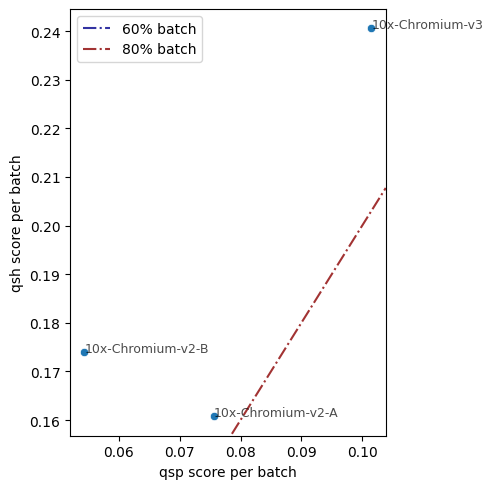

In [12]:
biolucid.visualization.plot_scatter_analysis(per_sample_results_df)